In [6]:
import numpy as np
import pandas as pd
import scanpy as sc
import h5py

path = '/home/katerchen/Code/'

In [2]:
def load_from_HDF(fname):
    """Load data from a HDF5 file to a dictionary."""
    data = dict()
    with h5py.File(fname, 'r') as f:
        for key in f:
            data[key] = np.asarray(f[key])
            if isinstance(data[key][0], np.bytes_):
                data[key] = data[key].astype(str)
            # print(key + ":", f[key])
    return data


In [3]:
data_hdf = load_from_HDF(path + '/DrVAE-master/workspace/datafiles/CTRPv2+L1000_FDAdrugs6h_v2.1.h5')

In [4]:
data_hdf.keys()

dict_keys(['drug_drug', 'drug_m', 'drug_threshold', 'labeled_pert_cellid', 'pair_cid', 'pair_conc', 'pair_drug', 'pair_dur', 'pair_m', 'pair_s', 'pair_tid', 'pair_x1', 'pair_x2', 'pair_y', 'pair_ycont', 'sing_cid', 'sing_s', 'sing_tid', 'sing_x1', 'sing_y', 'sing_ycont'])

In [5]:
# Dictionary to store DataFrames
dataframes_dict = {}

# Iterate through the dictionary
for key, value in data_hdf.items():
    # Create a DataFrame from the dictionary value
    df = pd.DataFrame(value)
    
    # Store the DataFrame in the dataframes_dict with the corresponding key
    dataframes_dict[key] = df

In [15]:
# show shapes of the different dataframes in the dictionary
for i in dataframes_dict:
    print(i, dataframes_dict[i].shape)

drug_drug (46, 1)
drug_m (46, 53)
drug_threshold (46, 1)
labeled_pert_cellid (52, 1)
pair_cid (5377, 1)
pair_conc (5377, 1)
pair_drug (5377, 1)
pair_dur (5377, 1)
pair_m (5377, 53)
pair_s (5377, 1)
pair_tid (5377, 1)
pair_x1 (5377, 973)
pair_x2 (5377, 973)
pair_y (5377, 1)
pair_ycont (5377, 1)
sing_cid (927, 1)
sing_s (927, 1)
sing_tid (927, 1)
sing_x1 (927, 973)
sing_y (927, 46)
sing_ycont (927, 46)


In [38]:
print('There are ' + str(dataframes_dict['pair_cid'][0].unique().shape[0]) + " cell types in the paired dataset.")
print('There are ' + str(dataframes_dict['sing_cid'][0].unique().shape[0]) + " cell types in the singleton dataset.")

There are 66 cell types in the paired dataset.
There are 927 cell types in the singleton dataset.


In [16]:
# merge drug_drug, drug_m and drug_threshold together
drug_m = dataframes_dict['drug_m']
drug_threshold = dataframes_dict['drug_threshold']
# set drug_drug as index
drug_drug_df = pd.concat([drug_m, 
                          # drug_threshold], 
                         ], axis=1)
drug_drug_df.index = dataframes_dict['drug_drug'].iloc[:,0]
drug_drug_df.head()

,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,50,51,52
0,,,,,,,,,,,,,,,,,,,,,
axitinib,0.526584,0.0,0.357143,0.439024,0.846930,0.585142,0.276370,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
bortezomib,0.206888,0.0,0.714286,0.292683,0.309188,0.003407,0.204981,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
bosutinib,0.433368,0.0,0.571429,0.439024,0.940206,0.824796,0.358284,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
chlorambucil,0.458484,0.0,0.571429,0.268293,0.654181,0.219869,0.138175,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ciclosporin,0.845244,1.0,1.000000,1.000000,0.000000,0.286210,1.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
# combine pair_cid, pair_conc, pair_drug, pair_dur, pair_m, pair_s, pair_tid, pair_x1, pair_x2, pair_y, pair_ycont together in a dataframe
pair_cid = dataframes_dict['pair_cid']
pair_conc = dataframes_dict['pair_conc']
pair_drug = dataframes_dict['pair_drug']
pair_dur = dataframes_dict['pair_dur']
pair_m = dataframes_dict['pair_m']
pair_s = dataframes_dict['pair_s']
pair_tid = dataframes_dict['pair_tid']
pair_x1 = dataframes_dict['pair_x1']
pair_x2 = dataframes_dict['pair_x2']
pair_y = dataframes_dict['pair_y']
pair_ycont = dataframes_dict['pair_ycont']

# combine all dataframes together
pair_df = pd.concat([pair_cid, pair_conc, pair_drug, pair_dur, pair_m, pair_s, pair_tid, pair_x1, pair_x2, pair_y, pair_ycont], axis=1)

pair_df.head()

,0,0,0,0,0,1,2,3,4,5,...,965,966,967,968,969,970,971,972,0,0
0,A375,10.0,axitinib,6.0,0.526584,0.0,0.357143,0.439024,0.84693,0.585142,...,-0.167294,0.467511,-0.800432,-0.878701,-0.200069,0.362760,-0.224290,0.202363,0.0,0.098593
1,A375,10.0,axitinib,6.0,0.526584,0.0,0.357143,0.439024,0.84693,0.585142,...,-0.283466,0.403544,-0.408099,-0.709807,-0.373901,0.089155,-0.040458,0.274494,0.0,0.098593
2,A549,10.0,axitinib,6.0,0.526584,0.0,0.357143,0.439024,0.84693,0.585142,...,-0.456418,0.241627,0.150217,0.572812,-0.729976,0.950893,0.580356,-1.027808,0.0,0.137518
3,A549,10.0,axitinib,6.0,0.526584,0.0,0.357143,0.439024,0.84693,0.585142,...,0.365833,0.727074,-0.395207,0.405124,-0.859534,0.228536,1.642698,-0.694913,0.0,0.137518
4,HA1E,10.0,axitinib,6.0,0.526584,0.0,0.357143,0.439024,0.84693,0.585142,...,-0.414176,0.287013,-0.166878,0.122456,-0.096537,1.854840,1.411374,0.238944,-1.0,NaN


In [18]:
# compare variances of pair_x1 and pair_x2
print(pair_x1.var(axis=0))
print(pair_x2.var(axis=0))

0      0.374297
1      0.486383
2      0.916697
3      0.333821
4      0.373949
         ...   
968    0.490129
969    0.307960
970    0.684869
971    0.353448
972    0.227334
Length: 973, dtype: float64
0      0.466165
1      0.499939
2      0.913121
3      0.363548
4      0.421266
         ...   
968    0.487016
969    0.369014
970    0.703398
971    0.397001
972    0.246629
Length: 973, dtype: float64


In [19]:
# compare means of pair_x1 and pair_x2
print(pair_x1.mean(axis=0))
print(pair_x2.mean(axis=0))

0     -0.111390
1     -0.009814
2      0.015375
3     -0.036140
4      0.006909
         ...   
968   -0.025180
969   -0.064351
970   -0.004757
971   -0.024785
972   -0.004109
Length: 973, dtype: float64
0      0.061640
1      0.001170
2     -0.012043
3      0.013785
4     -0.016895
         ...   
968    0.037915
969    0.027705
970    0.031278
971    0.023068
972    0.013670
Length: 973, dtype: float64


In [20]:
# merge sing_cid, sing_drug, sing_m, sing_s, sing_tid, sing_x, sing_y, sing_ycont together
sing_cid = dataframes_dict['sing_cid']
sing_s = dataframes_dict['sing_s']
sing_tid = dataframes_dict['sing_tid']
sing_x = dataframes_dict['sing_x1']
sing_y = dataframes_dict['sing_y']
sing_ycont = dataframes_dict['sing_ycont']

# combine all dataframes together
sing_df = pd.concat([sing_cid, sing_s, sing_tid, sing_x, sing_y, sing_ycont], axis=1)
sing_df.head()

,0,0,0,0,1,2,3,4,5,6,...,36,37,38,39,40,41,42,43,44,45
0,22RV1,0.0,prostate,0.184108,0.903583,-0.202761,-0.604024,0.037150,-0.433353,-0.295609,...,0.031647,0.000670,0.413564,NaN,0.645128,0.102989,0.235330,0.400533,0.681339,0.455519
1,2313287,0.0,stomach,0.580390,0.439248,-0.564393,-0.195108,0.018124,1.007301,0.345101,...,0.127299,0.002375,0.514340,NaN,0.545438,0.224295,0.266471,0.532575,0.691352,0.345581
2,5637,0.0,urinary_tract,-1.210655,-0.892759,-0.945895,-0.224048,-0.432040,-0.735524,-0.783623,...,0.083375,0.191377,0.467811,NaN,0.598256,0.021146,0.264676,0.452257,0.580671,0.443620
3,639V,0.0,urinary_tract,-0.548445,-0.530245,0.237243,0.018607,0.144762,-0.489605,0.157984,...,0.008790,0.013457,0.292699,NaN,0.561603,0.001686,0.112259,0.089677,0.326979,0.108655
4,647V,0.0,urinary_tract,-0.057345,-1.142915,-0.579804,0.323297,-0.108746,0.375613,-0.854028,...,NaN,0.228783,NaN,0.026109,0.762024,0.074321,0.133629,0.109458,0.640810,0.341431


<class 'pandas.core.frame.DataFrame'>
Index: 46 entries, axitinib to vorinostat
Data columns (total 53 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       46 non-null     float64
 1   1       46 non-null     float64
 2   2       46 non-null     float64
 3   3       46 non-null     float64
 4   4       46 non-null     float64
 5   5       46 non-null     float64
 6   6       46 non-null     float64
 7   7       46 non-null     float64
 8   8       46 non-null     float64
 9   9       46 non-null     float64
 10  10      46 non-null     float64
 11  11      46 non-null     float64
 12  12      46 non-null     float64
 13  13      46 non-null     float64
 14  14      46 non-null     float64
 15  15      46 non-null     float64
 16  16      46 non-null     float64
 17  17      46 non-null     float64
 18  18      46 non-null     float64
 19  19      46 non-null     float64
 20  20      46 non-null     float64
 21  21      46 non-null     float64

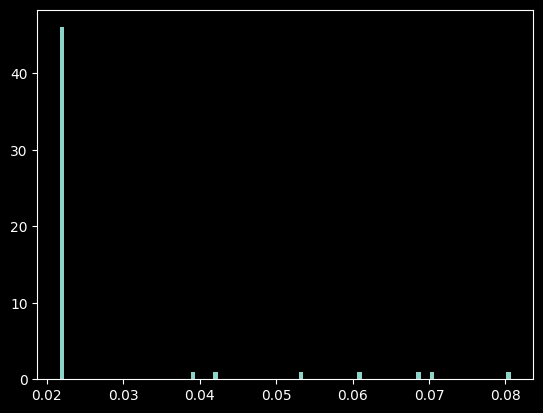

In [21]:
# explore drug_drug_df
drug_drug_df.head()
drug_drug_df.info()
drug_drug_df.describe()
drug_drug_df.isnull().sum()

# variance of drug_drug_df
drug_drug_df.var()

# plot variance of drug_drug_df
import matplotlib.pyplot as plt
plt.hist(drug_drug_df.var(), bins=100)
plt.show()
